In [1]:
import logging

In [2]:
logging.basicConfig(filename='words_logfile.log',
                    filemode='a',
                    level = logging.INFO,
                    format='%(asctime)s %(levelname)s-%(message)s',
                    datefmt='%Y-%m-%d %H:%M:%S'
                    )

logger=logging.getLogger()


## Task 1 
### q1 = try to find out a count of each and every word in a respective file return a list of tuple with word and its respective count
### sample example - [('sudh', 6 ) , ('kumar',3)]

In [3]:
def count_word(file_name):
    logger.info("Enter Task 1 count_word module")
    words=[]
    try:
        f=open(file_name,'r')
        for line in f:
            line=line.strip()
            words.append(line)
    except Exception as e:
        logger.error("Error in file reading : ",str(e))
    else:
        word_count=[]
        unique_words=list(set(words))
        unique_words.sort()
        for i in unique_words:
            word_count.append((i,words.count(i)))
        logger.info("Task 1 done. Words counted for {0} records from {1} dataset".format(str(len(words)),file_name))
        f.close()
        return word_count    

In [4]:
data=count_word('vocab.kos.txt')

In [5]:
data[:15]

[('aarp', 1),
 ('abandon', 1),
 ('abandoned', 1),
 ('abandoning', 1),
 ('abb', 1),
 ('abc', 1),
 ('abcs', 1),
 ('abdullah', 1),
 ('ability', 1),
 ('aboard', 1),
 ('abortion', 1),
 ('abortions', 1),
 ('abraham', 1),
 ('abrams', 1),
 ('abroad', 1)]

## Task 2
### q2 = try to perform a reduce operation to get a count of all the word starting with same alphabet
### sample examle = [(a,56) , (b,34),...........]

In [6]:
def same_alphabet(file):
    logger.info("Enter Task 2 same_alphabet module ")
    alpha=[]
    word=[]
    try:
        f=open(file,'r')
        for i in f:
            i=i.strip()
            alpha.append(i[0])
            word.append(i)
    except Exception as e:
        logger.error("Error in file reading : ",str(e))
    else:
        unique_alpha=list(set(alpha))
        unique_alpha.sort()
        alpha_count=[]
        for i in unique_alpha:
            count=0
            for j in word:
                if i==j[0]:
                    count=count +1
            alpha_count.append((i,count))
        logger.info("Task 2 done. Words counted for {0} records from {1} dataset".format(str(len(word)), file))
        f.close()
        return alpha_count
            

In [7]:
data=same_alphabet('vocab.kos.txt')

In [8]:
data

[('a', 492),
 ('b', 368),
 ('c', 666),
 ('d', 448),
 ('e', 294),
 ('f', 333),
 ('g', 195),
 ('h', 246),
 ('i', 269),
 ('j', 89),
 ('k', 70),
 ('l', 257),
 ('m', 344),
 ('n', 139),
 ('o', 175),
 ('p', 525),
 ('q', 30),
 ('r', 461),
 ('s', 742),
 ('t', 323),
 ('u', 105),
 ('v', 96),
 ('w', 205),
 ('y', 26),
 ('z', 8)]

## Task 3
### q3 = Try to filter out all the words from dataset . 
### .001.abstract = abstract ; .002 = delete

In [9]:
def filter_word(file):
    logger.info("Enter Task 4 filter_word module ")
    words=[]
    try:
        f=open(file,mode='r',encoding="utf8")
        for row in f:
            if row.isalpha()==True:
                words.append(row)
            else:
                wd=""
                for char in row:
                    if char.isalpha()==True:
                        wd+=char
                words.append(wd)
    
    except Exception as e:
        logger.error("Error in reading file : ",str(e))
        
    else:
        fil_words=[]
        unique_words=list(set(words))
        unique_words.sort()
        for i in unique_words:
            if len(i)>=0:
                if len(i)>0:
                    fil_words.append(i)
                
        logger.info("Task 3 done. Words counted for {0} records from {1} dataset".format(str(len(words)),file))
        f.close()
        return fil_words

In [10]:
data=filter_word('vocab.pubmed.txt')

In [11]:
data[:12]

['a',
 'aa',
 'aaa',
 'aaaa',
 'aaad',
 'aaamyloidosis',
 'aaar',
 'aaas',
 'aab',
 'aabb',
 'aabr',
 'aabstract']

## Task 4
### q4 = create a tuple set of all the records avaialble in all the five file and then store it in sqllite DB .
### (aah,>=,354,fdsf,wer)

In [12]:
def collect_data(file):
    logger.info("Enter Task 4 collect_data module")
    file_list=[]
    try:
        f=open(file,mode='r',encoding="utf8")
        for row in f:
            file_list.append(row)
    
    except Exception as e:
        logger.error("Error in reading file :",str(e))
        f.close()
        
    else:
        logger.info("File Reading successful in {0}".format(file))
        f.close()
        return file_list
            

In [13]:
f1=collect_data('vocab.enron.txt')
f2=collect_data('vocab.kos.txt')
f3=collect_data('vocab.nips.txt')
f4=collect_data('vocab.nytimes.txt')
f5=collect_data('vocab.pubmed.txt')

In [14]:
final_list=list(zip(f1,f2,f3,f4,f5))

In [15]:
final_list[:10]

[('aaa\n', 'aarp\n', 'a2i\n', 'aah\n', '>=\n'),
 ('aaas\n', 'abandon\n', 'aaa\n', 'aahed\n', '>>\n'),
 ('aactive\n', 'abandoned\n', 'aaai\n', 'aaron\n', '>>>\n'),
 ('aadvantage\n', 'abandoning\n', 'aapo\n', 'aback\n', '>/=\n'),
 ('aaker\n', 'abb\n', 'aat\n', 'abacus\n', '->\n'),
 ('aap\n', 'abc\n', 'aazhang\n', 'abajo\n', '--\n'),
 ('aapg\n', 'abcs\n', 'abandonment\n', 'abalone\n', '-->\n'),
 ('aaron\n', 'abdullah\n', 'abbott\n', 'abandon\n', '-/-\n'),
 ('aarp\n', 'ability\n', 'abbreviated\n', 'abandoned\n', '-/+\n'),
 ('aas\n', 'aboard\n', 'abcde\n', 'abandoning\n', '/-\n')]

In [16]:
#dump into databse
import sqlite3

In [17]:
try:
    db = sqlite3.connect('word_database.db')
    logger.info('Database Created: ' +  str(db))
    cursor = db.cursor()
    query = "CREATE TABLE main_table(file1 text, file2 text, file3 text, file4 text, file5 text)"
    cursor.execute(query)

    record_count = 0 
    for record in final_list:
        query = "INSERT INTO main_table VALUES {}".format(tuple(record))
        cursor.execute(query)
        record_count += 1
        
    db.commit()
    
    logger.info('Total records inserted: ' +  str(record_count))
        
except Exception as e:
    logger.error('Error: ' + str(e))

finally:
    db.close()

In [18]:
db = sqlite3.connect('word_database.db')
cursor = db.cursor()

In [19]:
data = cursor.execute("select * from main_table limit 20")
for i in data:
    print(i)

('aaa\\n', 'aarp\\n', 'a2i\\n', 'aah\\n', '>=\\n')
('aaas\\n', 'abandon\\n', 'aaa\\n', 'aahed\\n', '>>\\n')
('aactive\\n', 'abandoned\\n', 'aaai\\n', 'aaron\\n', '>>>\\n')
('aadvantage\\n', 'abandoning\\n', 'aapo\\n', 'aback\\n', '>/=\\n')
('aaker\\n', 'abb\\n', 'aat\\n', 'abacus\\n', '->\\n')
('aap\\n', 'abc\\n', 'aazhang\\n', 'abajo\\n', '--\\n')
('aapg\\n', 'abcs\\n', 'abandonment\\n', 'abalone\\n', '-->\\n')
('aaron\\n', 'abdullah\\n', 'abbott\\n', 'abandon\\n', '-/-\\n')
('aarp\\n', 'ability\\n', 'abbreviated\\n', 'abandoned\\n', '-/+\\n')
('aas\\n', 'aboard\\n', 'abcde\\n', 'abandoning\\n', '/-\\n')
('aau\\n', 'abortion\\n', 'abe\\n', 'abandonment\\n', '/+-\\n')
('ab1890\\n', 'abortions\\n', 'abeles\\n', 'abandono\\n', '..\\n')
('ab1x\\n', 'abraham\\n', 'abi\\n', 'abarnard\\n', '...\\n')
('ab31x\\n', 'abrams\\n', 'abilistic\\n', 'abashed\\n', '+-\\n')
('aba\\n', 'abroad\\n', 'abilities\\n', 'abate\\n', '+/\\n')
('abacus\\n', 'absence\\n', 'ability\\n', 'abated\\n', '+/--\\n')
('a

## Log File View
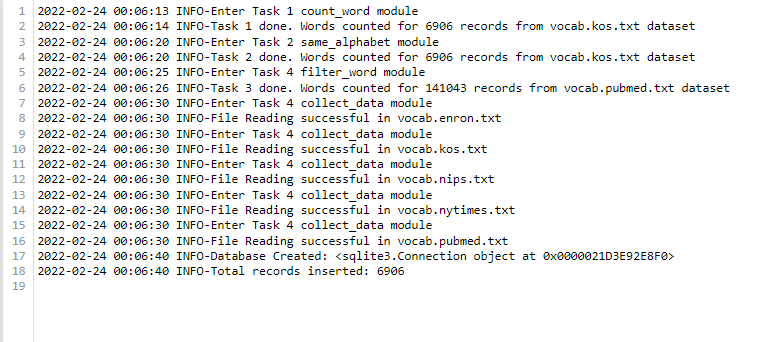